In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ruptures as rpt

Import some jobs

/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_gysela/job_101329.csv


array([[<AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>]], dtype=object)

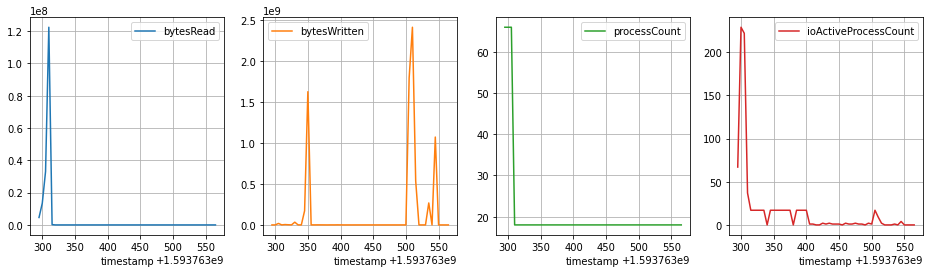

In [89]:
import os, random
job_files = []
dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation"
#dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_oth_db"
#dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_sop_db"
#dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_gysela"
dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_namd"

for root, dirs, files in os.walk(dataset_path):
    for csv_file in files:
        if csv_file.endswith(".csv"):
            job_files.append(os.path.join(root, csv_file))

csv_file = random.choice(job_files)

#csv_file = os.path.join("/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_oth_db/job_1330.csv")
#csv_file = os.path.join("/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_mat_db/job_6382.csv")
csv_file = os.path.join("/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_gysela/job_101329.csv")

print(csv_file)

df = pd.read_csv(csv_file, index_col=0)#, dtype=np.float32)
df.plot(x="timestamp", figsize=(16,4), sharex=True, grid=True, subplots=True, layout=(1, 4))



Basic plot

In [90]:
signal_w = df["bytesWritten"].values
signal_r = df["bytesRead"].values
#print(signal)

Use Kmeans clustering for phase detection

In [91]:
import numpy as np
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

##############################################################################
# Compute clustering with KMeans
def clustering(signal, n):
    k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
    t0 = time.time()
    k_means.fit(signal)
    t_batch = time.time() - t0
    k_means_labels = k_means.labels_
    k_means_cluster_centers = k_means.cluster_centers_
    #print(k_means_labels, t_batch)
    return k_means_labels

def find_best_cluster(signal, min_diff=0.01, max_n=8):
    step = 2
    n_clusters = step
    n_best = step
    best_score = -1
    n_samples = len(signal)
    best_preds = np.random.choice(n_clusters, n_samples)  # init with random labels

    while step <= max_n and n_clusters < n_samples:
        preds = clustering(signal, step)
        score = silhouette_score(signal, preds, metric="euclidean")
        #print(score)
        if score > best_score * (1 + min_diff):  # if better score
            best_score = score
            best_preds = preds       
            n_best = step  
        step += 1
        n_clusters += 1
    
    return best_preds, n_best

def changepoint_detection(changes):
    result=[]
    
    for idx in range(len(changes)-1):
        if changes[idx] != changes[idx+1]:
            #print(idx)
            result.append(idx+1)
    return result


(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

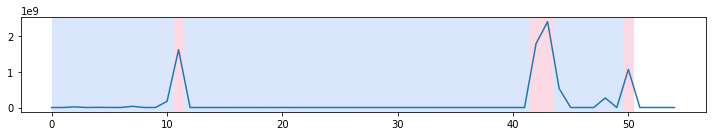

In [92]:
k_means_labels= clustering(signal_w.reshape(-1, 1), 2)
res = changepoint_detection(k_means_labels)
rpt.display(signal_w, res)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0] 9
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 9


/tmp/ipykernel_3478624/2875713742.py:11: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  k_means.fit(signal)
/tmp/ipykernel_3478624/2875713742.py:11: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  k_means.fit(signal)


(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

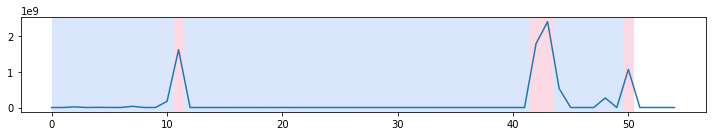

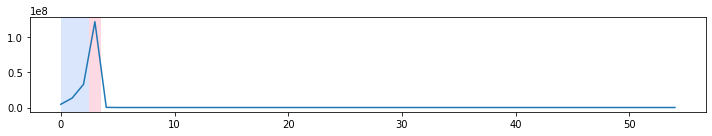

In [93]:
k_means_labels, n= find_best_cluster(signal_w.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_w, res)
k_means_labels, n= find_best_cluster(signal_r.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_r, res)

[1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 0 1 1 1 1 1 2 0 1 1 1] 9
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 9


/tmp/ipykernel_3478624/2875713742.py:11: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  k_means.fit(signal)
/tmp/ipykernel_3478624/2875713742.py:11: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  k_means.fit(signal)


(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

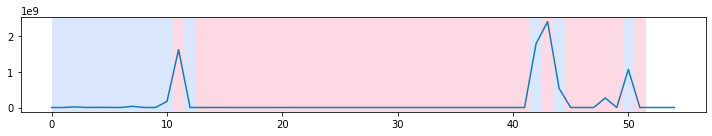

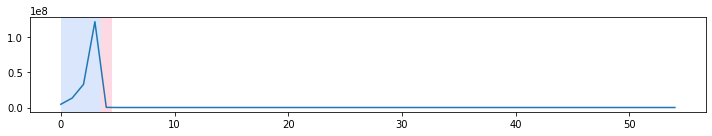

In [94]:
#delta signal
signal_w_del = df["bytesWritten"].diff().fillna(0).values
signal_r_del = df["bytesRead"].diff().fillna(0).values
k_means_labels, n= find_best_cluster(signal_w_del.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_w, res)
k_means_labels, n= find_best_cluster(signal_r_del.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_r, res)

Benchmark kmeans

In [57]:
def list_jobs(dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/"):
    job_files = []
    job_ids = []
    dataset = []
    for root, dirs, files in os.walk(dataset_path):
        for csv_file in files:
            if csv_file.endswith(".csv"):
                job_files.append(os.path.join(root, csv_file))
                job_ids.append(csv_file.split("_")[-1].split(".csv")[0])
                dataset.append(os.path.split(root)[-1])
    return job_files, job_ids, dataset

path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/"
job_files, job_ids, datasets = list_jobs(path)
print(len(job_files))
print(datasets)

53
['dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_oth_db', 'dataset_namd', 'dataset_namd', 'dataset_namd', 'dataset_namd', 'dataset_namd', 'dataset_namd', 'dataset_namd', 'dataset_namd', 'dataset_namd', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_mat_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_sop_db', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela', 'dataset_gysela']


In [58]:
df = pd.DataFrame(columns=["dataset", "file_name", "jobid", "timeserie", "signal_length", "n_cluster", "change_points", "computation_time"])

job_files, job_ids, datasets = list_jobs()
for job_file, job_id, dataset in zip(job_files, job_ids, datasets):
    #print(job_file)
    df_signal = pd.read_csv(job_file, index_col=0)
    for ts in ["bytesWritten", "bytesRead"]:
        signal = df_signal[[ts]].to_numpy()
        signal_dim = signal.shape[1]
        algos_name = "Kmeans"

        start_time = time.time()
        k_means_labels, n_cluster= find_best_cluster(signal.reshape(-1, 1))
        res = changepoint_detection(k_means_labels)
        duration = time.time() - start_time
        n_brkpts = len(res) - 1

        df = df.append({"dataset": dataset,
                        "file_name": job_file,
                        "jobid": job_id,
                        "timeserie": ts,
                        "signal_length": signal.shape[0],
                        "n_cluster": n_cluster,
                        "change_points": n_brkpts,
                        "computation_time": duration,
                        },
                    ignore_index=True)
df.to_csv("kmeans_bench.csv")

/tmp/ipykernel_3478624/589879136.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"dataset": dataset,
/tmp/ipykernel_3478624/2735709928.py:11: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  k_means.fit(signal)
/tmp/ipykernel_3478624/2735709928.py:11: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_means.fit(signal)
/tmp/ipykernel_3478624/589879136.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"dataset": dataset,
/tmp/ipykernel_3478624/589879136.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"dataset"

In [72]:
from utils import *
def plot_bench_decomposition_kmeans(bench_file="kmeans_bench.csv", idx = 0):
    bench_df = pd.read_csv(bench_file, index_col=0)

    if idx == "rnd":
        idx = int(bench_df.sample().index.values[0])

    csv_file = bench_df.iloc[idx]["file_name"]
    n_cluster = bench_df.iloc[idx]["n_cluster"]
    change_points = bench_df.iloc[idx]["change_points"]
    print(f"{csv_file = }")
    print(f"{n_cluster = }")
    print(f"{change_points = }")
    df = pd.read_csv(csv_file, index_col=0)

    timeserie = bench_df.iloc[idx]["timeserie"]
    signal = df[[timeserie]].to_numpy()
    k_means_labels = clustering(signal.reshape(-1, 1), n_cluster)
    res = changepoint_detection(k_means_labels)
    rpt.display(signal, res)


csv_file = '/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_sop_db/job_11638.csv'
n_cluster = 6
change_points = 7
csv_file = '/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_oth_db/job_1336.csv'
n_cluster = 6
change_points = 281
csv_file = '/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_namd/job_4949.csv'
n_cluster = 6
change_points = 11


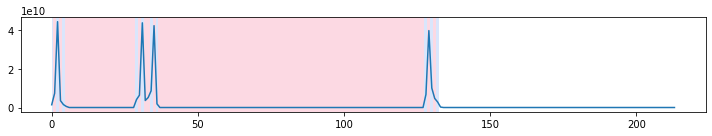

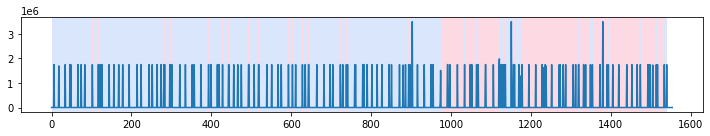

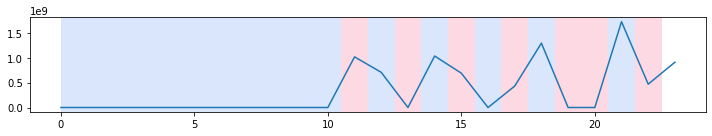

In [80]:
plot_bench_decomposition_kmeans(bench_file="kmeans_bench.csv", idx=67)
plot_bench_decomposition_kmeans(bench_file="kmeans_bench.csv", idx=15)
plot_bench_decomposition_kmeans(bench_file="kmeans_bench.csv", idx=20)

csv_file = '/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_gysela/job_109567.csv'
n_cluster = 6
change_points = 21
csv_file = '/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_gysela/job_109567.csv'
n_cluster = 6
change_points = 3


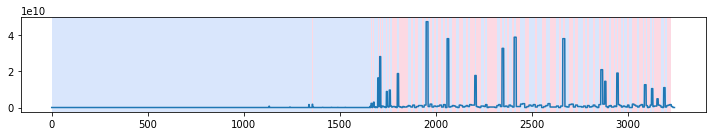

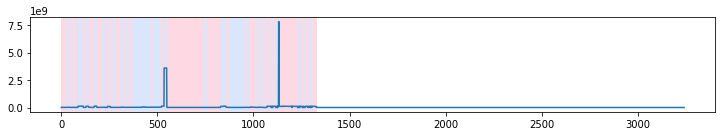

In [86]:
#!pip install tkinter
#%matplotlib tk
plt.rcParams["figure.figsize"] = (18, 10)
plot_bench_decomposition_kmeans(bench_file="kmeans_bench.csv", idx=92)
plot_bench_decomposition_kmeans(bench_file="kmeans_bench.csv", idx=93)

Use Gaussian Misture model to estimate the distribution

In [8]:
import numpy as np
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
arr_w = np.float32(signal_w)
observed_counts = tf.convert_to_tensor(arr_w)
print(observed_counts)

2022-07-19 13:52:54.718000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 13:52:54.718040: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


tf.Tensor(
[4.1490000e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.8100000e+02 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.1231602e+09 6.0477792e+08 3.8200000e+02 1.0886008e+09 6.3933670e+08
 0.0000000e+00 9.2157152e+07 1.6357807e+09 0.0000000e+00 0.0000000e+00
 1.2325960e+09 4.9534214e+08 1.3823500e+09], shape=(23,), dtype=float32)


2022-07-19 13:53:01.932152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-19 13:53:01.932185: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-19 13:53:01.932211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kea6): /proc/driver/nvidia/version does not exist


In [9]:
max_num_states = 10

def build_latent_state(num_states, max_num_states, daily_change_prob=0.05):

  # Give probability exp(-100) ~= 0 to states outside of the current model.
  active_states_mask = tf.concat([tf.ones([num_states]),
                                  tf.zeros([max_num_states - num_states])],
                                 axis=0)
  initial_state_logits = -100. * (1 - active_states_mask)

  # Build a transition matrix that transitions only within the current
  # `num_states` states.
  transition_probs = tf.fill([num_states, num_states],
                             0. if num_states == 1
                             else daily_change_prob / (num_states - 1))  
  padded_transition_probs = tf.eye(max_num_states) + tf.pad(
      tf.linalg.set_diag(transition_probs,
                         tf.fill([num_states], - daily_change_prob)),
      paddings=[(0, max_num_states - num_states),
                (0, max_num_states - num_states)])

  return initial_state_logits, padded_transition_probs

# For each candidate model, build the initial state prior and transition matrix.
batch_initial_state_logits = []
batch_transition_probs = []
for num_states in range(1, max_num_states+1):
  initial_state_logits, transition_probs = build_latent_state(
      num_states=num_states,
      max_num_states=max_num_states)
  batch_initial_state_logits.append(initial_state_logits)
  batch_transition_probs.append(transition_probs)

batch_initial_state_logits = tf.stack(batch_initial_state_logits)
batch_transition_probs = tf.stack(batch_transition_probs)
print("Shape of initial_state_logits: {}".format(batch_initial_state_logits.shape))
print("Shape of transition probs: {}".format(batch_transition_probs.shape))
print("Example initial state logits for num_states==3:\n{}".format(batch_initial_state_logits[2, :]))
print("Example transition_probs for num_states==3:\n{}".format(batch_transition_probs[2, :, :]))

Shape of initial_state_logits: (10, 10)
Shape of transition probs: (10, 10, 10)
Example initial state logits for num_states==3:
[  -0.   -0.   -0. -100. -100. -100. -100. -100. -100. -100.]
Example transition_probs for num_states==3:
[[0.95  0.025 0.025 0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.95  0.025 0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.025 0.95  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]


In [10]:
trainable_log_rates = tf.Variable(
    tf.fill([batch_initial_state_logits.shape[0], max_num_states],
            tf.math.log(tf.reduce_mean(observed_counts))) + 
     tf.random.stateless_normal([1, max_num_states], seed=(42, 42)),
     name='log_rates')
    
hmm = tfd.HiddenMarkovModel(
  initial_distribution=tfd.Categorical(
      logits=batch_initial_state_logits),
  transition_distribution=tfd.Categorical(probs=batch_transition_probs),
  observation_distribution=tfd.Poisson(log_rate=trainable_log_rates),
  num_steps=len(observed_counts))
print("Defined HMM with batch shape: {}".format(hmm.batch_shape))

Defined HMM with batch shape: (10,)


Text(0, 0.5, 'Negative log marginal likelihood')

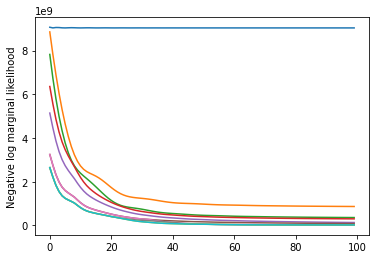

In [11]:
rate_prior = tfd.LogNormal(5, 5)

def log_prob():
  prior_lps = rate_prior.log_prob(tf.math.exp(trainable_log_rates))
  prior_lp = tf.stack(
      [tf.reduce_sum(prior_lps[i, :i+1]) for i in range(max_num_states)])
  return prior_lp + hmm.log_prob(observed_counts)

losses = tfp.math.minimize(
    lambda: -log_prob(),
    optimizer=tf.optimizers.Adam(0.1),
    num_steps=100)
plt.plot(losses)
plt.ylabel('Negative log marginal likelihood')

In [12]:
num_states = np.arange(1, max_num_states+1)
print(num_states, -losses[-1])


[ 1  2  3  4  5  6  7  8  9 10] tf.Tensor(
[-9.0348800e+09 -8.6835520e+08 -3.6275027e+08 -3.0317242e+08
 -1.3584115e+08 -8.8728864e+07 -3.2193964e+07 -2.9603284e+07
 -2.6099844e+07 -2.5735538e+07], shape=(10,), dtype=float32)


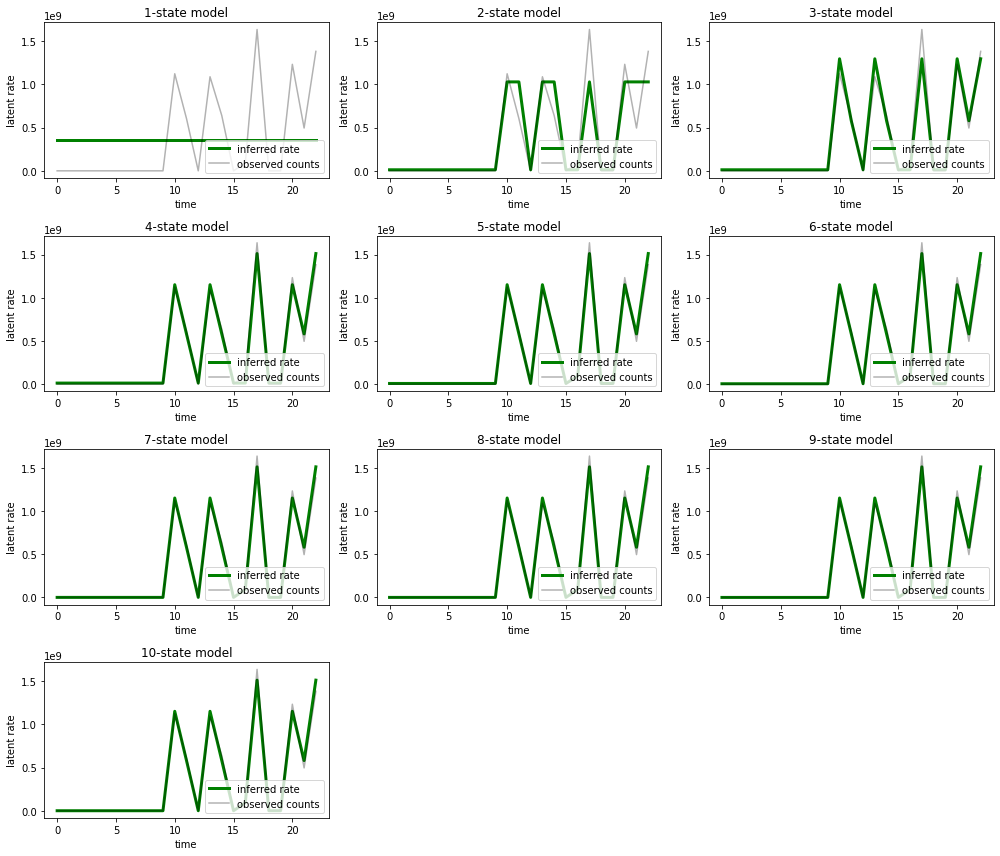

In [13]:
rates = tf.exp(trainable_log_rates)
most_probable_states = hmm.posterior_mode(observed_counts)
fig = plt.figure(figsize=(14, 12))
for i, learned_model_rates in enumerate(rates):
  ax = fig.add_subplot(4, 3, i+1)
  ax.plot(tf.gather(learned_model_rates, most_probable_states[i]), c='green', lw=3, label='inferred rate')
  ax.plot(observed_counts, c='black', alpha=0.3, label='observed counts')
  ax.set_ylabel("latent rate")
  ax.set_xlabel("time")
  ax.set_title("{}-state model".format(i+1))
  ax.legend(loc=4)
plt.tight_layout()

Some biblio:
- https://arxiv.org/abs/2003.06222
- https://arxiv.org/pdf/1801.00718.pdf
- https://github.com/alan-turing-institute/TCPDBench
- https://www.youtube.com/watch?v=Sb89wJaCp7o&ab_channel=VideoLecturesChannel
- https://notebook.community/hildensia/bayesian_changepoint_detection/Example%20Code
- https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/
- https://schuetzgroup.github.io/sdt-python/changepoint.html
- https://centre-borelli.github.io/ruptures-docs/
- https://paperswithcode.com/task/change-point-detection
- https://github.com/YKatser/CPDE
- https://arxiv.org/pdf/2204.07403v1.pdf
- https://github.com/cruiseresearchgroup/TSCP2